# TASK 2 MACHINE LEARNING USING LINEAR REGRESSION ALGORITHM

# In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

### 2] READING THE DATA 

In [2]:
data="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data1=pd.read_csv(data)

### 3] DISPLAYING TOP 5 VALUES OF THE DATA

In [3]:
data1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 4] DISPLAYING THE INFO 

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 5] DISPLAYNG STATISTICAL DETAILS

In [5]:

data1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 6] CALCULATING SUM OF ALL NULL VALUES IN PARTICULAR COLUMN

In [6]:
print(data1.isnull().sum())

Hours     0
Scores    0
dtype: int64


### 7] CHECKING FOR NULL VALUES USING HEATMAP

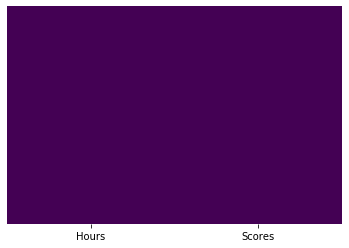

In [7]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 8] PLOTTING THE DATA 

In [8]:
def plot(data1):
    data1.plot(x='Hours', y='Scores', style ='o')
    plt.title('LINEAR REGRESSION')
    plt.xlabel('HOURS STUDIED')
    plt.ylabel('SCORE')
    plt.show()

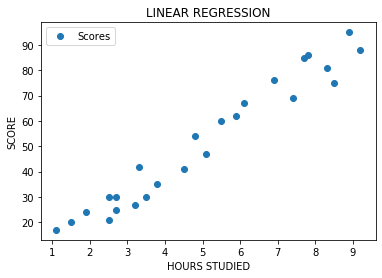

In [9]:
plot(data1)

### 9] TRANSFERRING DATA FROM HOURS AND SCORE IN x AND y RESPECTIVELY USING INDEXING

In [10]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values



### 10] RESHAPING INTO A 2D ARRAY

In [11]:
x.reshape(1,-1)


array([[2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]])

In [12]:
y.reshape(1,-1)


array([[21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95,
        30, 24, 67, 69, 30, 54, 35, 76, 86]], dtype=int64)

### 11] IMPORTING SCIKITLEARN PACKAGES

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [14]:
x_train.reshape(1,-1)

array([[4.8, 3.2, 8.5, 5.1, 1.1, 6.1, 2.5, 4.5, 1.5, 6.9, 2.7, 3.5, 8.3,
        3.3, 2.7, 8.9, 7.8, 9.2, 1.9, 5.9]])

In [15]:
y_train.reshape(1,-1)

array([[54, 27, 75, 47, 17, 67, 21, 41, 20, 76, 30, 30, 81, 42, 25, 95,
        86, 88, 24, 62]], dtype=int64)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

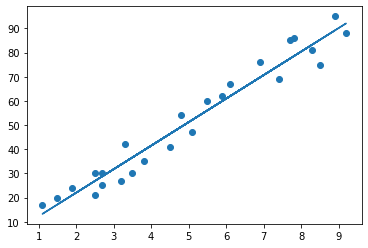

In [17]:
line= reg.coef_*x+reg.intercept_
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [18]:
print(x_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [19]:
y_pred = reg.predict(x_test)

### 12] PRINTING THE DATAFRAME OF ACTUAL AND PREDICTED VALUES

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [21]:
df

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


In [22]:
def hrsp():
    print('note:hours of study between 0-12')
    h = float(input('Enter the hours of study:'))
    return h

In [23]:
hrs = hrsp()

note:hours of study between 0-12
Enter the hours of study:9.5


In [24]:
hrs

9.5

### 13] PREDICTING THE SCORE OF STUDENT FOR 9.5 HOURS OF STUDY

In [25]:
pred = reg.predict([[hrs]])
print("No of hours = {}".format(hrs))
print("Predicted Score = {}".format(pred[0]))

No of hours = 9.5
Predicted Score = 94.97854630359635


### 14] MEAN ABSOLUTE ERROR CALCULATION

In [27]:
from sklearn import metrics
print('MEAN ABSOLUTE ERROR:',metrics.mean_absolute_error(y_test,y_pred))

MEAN ABSOLUTE ERROR: 4.937597792467705
